In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"]) # caracteristicas del conjunto de entrenamiento
    train_set_y_orig = np.array(train_dataset["train_set_y"]) # etiquetas del conjunto de entrenamiento

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"]) # caracteristicas del conjunto de prueba
    test_set_y_orig = np.array(test_dataset["test_set_y"]) # etiquetas del conjunto de prueba

    classes = np.array(test_dataset["list_classes"]) # lista de clases
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_catvnoncat.h5 to test_catvnoncat.h5
Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [4]:
# Cargar los datos (cat/non-cat)
TRAIN_set_x_orig, TRAIN_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
print ("TRAIN_set_x_orig shape: " + str(TRAIN_set_x_orig.shape))
print ("TRAIN_set_y shape: " + str(TRAIN_set_y.shape))
print ("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

TRAIN_set_x_orig shape: (209, 64, 64, 3)
TRAIN_set_y shape: (209,)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (50,)


Text(0.5, 1.0, 'non-cat')

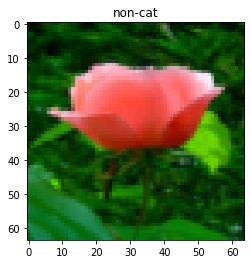

In [6]:
# Ejemplo de una imagen
index = 3
plt.imshow(TRAIN_set_x_orig[index])
plt.title(classes[TRAIN_set_y[index]].decode("utf-8"))

In [7]:
# Aplanamiento de la imagen
TRAIN_set_x_flatten = TRAIN_set_x_orig.reshape(TRAIN_set_x_orig.shape[0], -1)
test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)

print ("TRAIN_set_x_flatten shape: " + str(TRAIN_set_x_flatten.shape))
print ("TRAIN_set_y shape: " + str(TRAIN_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


TRAIN_set_x_flatten shape: (209, 12288)
TRAIN_set_y shape: (209,)
test_set_x_flatten shape: (50, 12288)
test_set_y shape: (50,)


In [8]:
# Escalamiento de los datos
TRAIN_set_x = TRAIN_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [9]:
train_set_x, valid_set_x, train_set_y, valid_set_y = train_test_split(TRAIN_set_x, TRAIN_set_y, test_size=0.25, random_state=42)


In [10]:
print ("TRAIN_set_x shape: " + str(TRAIN_set_x.shape))
print ("TRAIN_set_y shape: " + str(TRAIN_set_y.shape))
print ("train_set_x shape: " + str(train_set_x.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("valid_set_x shape: " + str(valid_set_x.shape))
print ("valid_set_y shape: " + str(valid_set_y.shape))
print ("test_set_x shape:  " + str(test_set_x.shape))
print ("test_set_y shape:  " + str(test_set_y.shape))

TRAIN_set_x shape: (209, 12288)
TRAIN_set_y shape: (209,)
train_set_x shape: (156, 12288)
train_set_y shape: (156,)
valid_set_x shape: (53, 12288)
valid_set_y shape: (53,)
test_set_x shape:  (50, 12288)
test_set_y shape:  (50,)


In [11]:
# Creación del modelo
model = Sequential([
                    Dense(units=1, input_shape= [train_set_x.shape[-1]], activation=sigmoid)
                    ])

In [12]:
# Arquitectura del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12289     
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Definición del optimizador, función de pérdidas y métricas
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )


In [14]:
model.fit(train_set_x, train_set_y, epochs=100, batch_size=32)

Epoch 1/100
5/5 [==============================] - 3s 4ms/step - loss: 0.6461 - binary_accuracy: 0.6370
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6560 - binary_accuracy: 0.6214
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6377 - binary_accuracy: 0.6361
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6271 - binary_accuracy: 0.6595
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6531 - binary_accuracy: 0.5873
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6457 - binary_accuracy: 0.6494
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6247 - binary_accuracy: 0.6754
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6326 - binary_accuracy: 0.6351
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6323 - binary_accuracy: 0.6429
Epoch 10/100
5/5 [==============================] - 0s 4ms/step 

In [15]:
# Realizar predicciones
train_pred_prob = model.predict(train_set_x)
valid_pred_prob = model.predict(valid_set_x)

In [16]:
# Predicción de clases
train_pred_class = train_pred_prob>0.5
valid_pred_class = valid_pred_prob>0.5

In [17]:
# Metricas
Metricas = model.evaluate(train_set_x, train_set_y , verbose=0)
Metricas

[0.46277114748954773, 0.8141025900840759]

In [18]:
# Accuracy
acc_train = accuracy_score(train_set_y, train_pred_class)
acc_valid = accuracy_score(valid_set_y, valid_pred_class)

print('Train Acc: ', acc_train)
print('Validation Acc: ', acc_valid)

Train Acc:  0.8141025641025641
Validation Acc:  0.660377358490566


In [19]:
# Creación del modelo
modelo_final = Sequential([
                    Dense(units=1, input_shape= [TRAIN_set_x.shape[-1]], activation=sigmoid)
                    ])

# Arquitectura del modelo
modelo_final.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 12289     
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Definición del optimizador, función de pérdidas y métricas
modelo_final.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss= tf.keras.losses.BinaryCrossentropy(),metrics=tf.keras.metrics.BinaryAccuracy() )


In [21]:
modelo_final.fit(TRAIN_set_x, TRAIN_set_y, epochs=100, batch_size=32)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6702 - binary_accuracy: 0.6077
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6745 - binary_accuracy: 0.6416
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_accuracy: 0.6510
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6424 - binary_accuracy: 0.6756
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6665 - binary_accuracy: 0.5709
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6485 - binary_accuracy: 0.6476
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6318 - binary_accuracy: 0.6248
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6313 - binary_accuracy: 0.6298
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6307 - binary_accuracy: 0.6328
Epoch 10/100
7/7 [==============================] - 0s 3ms/step 

In [22]:
# Realizar predicciones
TRAIN_pred_prob = modelo_final.predict(TRAIN_set_x)
test_pred_prob = modelo_final.predict(test_set_x)

# Predicción de clases
TRAIN_pred_class = TRAIN_pred_prob>0.5
test_pred_class = test_pred_prob>0.5

In [23]:
# Accuracy
acc_TRAIN = accuracy_score(TRAIN_set_y, TRAIN_pred_class)
acc_test = accuracy_score(test_set_y, test_pred_class)

print('TRAIN Acc: ', acc_TRAIN)
print('test Acc: ', acc_test)

TRAIN Acc:  0.7703349282296651
test Acc:  0.44


[0.6349088]


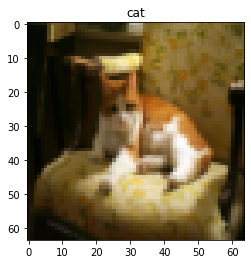

In [24]:
# Ejemplo de una imagen de entrenamiento
index = 7
plt.imshow(TRAIN_set_x_orig[index])
plt.title(classes[TRAIN_set_y[index]].decode("utf-8"))

print(TRAIN_pred_prob[index] )

[0.5144845]


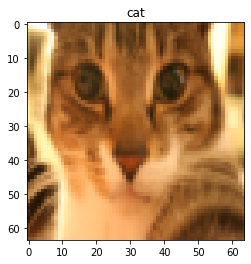

In [25]:
# Ejemplo de una imagen de prueba
index = 3
plt.imshow(test_set_x_orig[index])
plt.title(classes[test_set_y[index]].decode("utf-8"))

print(test_pred_prob[index] )